In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Damped Pendulum  
$
\dfrac{d}{dt}
\begin{bmatrix}
{\theta} \\
\dot{\theta}
\end{bmatrix}=
\begin{bmatrix}
\dot{\theta} \\
-\mu\dot{\theta}-(g/L)sin(\theta)
\end{bmatrix}$

In [2]:
# governing equations
def dSdt(t, S):
    T, Td = S
    return [Td,
            -0.4*Td-np.sin(T)]

# solving differential equations
S0 = (np.pi/2,-3.7)
time = 30
step = 24
t = np.linspace(0,time,time*step)
sol = solve_ivp(dSdt, (0,t.max()), S0, method='BDF', dense_output=True)
T = sol.sol(t)[0]
Td = sol.sol(t)[1]

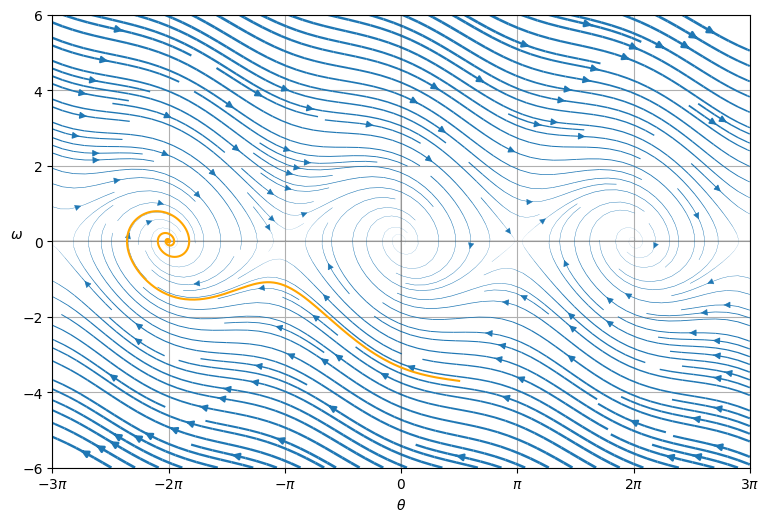

In [3]:
# phase space
div = 100
X, Y = np.meshgrid(np.linspace(-np.pi*3, np.pi*3, div),
                   np.linspace(-6, 6, div))
U, V = np.zeros((div,div)), np.zeros((div,div))
for i in range(div):
    for j in range(div):
        U[i, j], V[i, j] = dSdt(100, [X[i, j],Y[i, j]])
M = np.sqrt(U**2 + V**2)
plt.figure(figsize=(9,6),dpi=100)
plt.streamplot(X,Y,U,V,2,2*M/M.max())
plt.xlim(-np.pi*3, np.pi*3, step)
plt.ylim(-6,6)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\omega$",rotation=0)
plt.axhline(0,color='k',lw=0.2)
plt.axvline(0,color='k',lw=0.2)
theta = np.arange(-3*np.pi, 3*np.pi+np.pi/2, step=np.pi)
plt.xticks(theta, ['$-3\pi$','$-2\pi$','$-\pi$','$0$','$\pi$','$2\pi$','$3\pi$',])
plt.grid()
plt.plot(T,Td,color='orange')
plt.xlim(-np.pi*3, np.pi*3, step)
plt.ylim(-6,6)
plt.show()

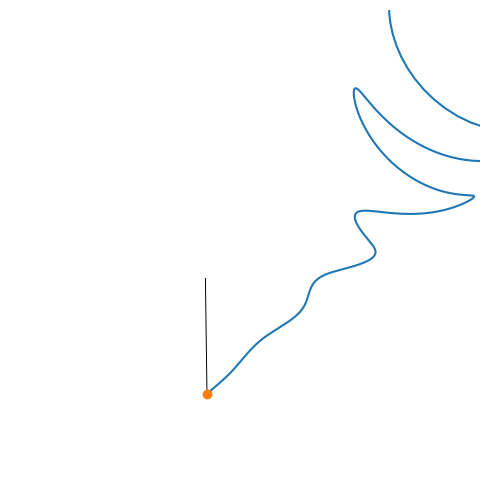

In [4]:
# simulation
fig = plt.figure(figsize=(5,5),dpi=100)
ax = plt.axes(projection='3d')
i=t.size
ax.plot(np.sin(T[0:i]), -t[0:i], -np.cos(T[0:i]), label='parametric curve',clip_on=True)
ax.plot([0,np.sin(T[i-1])],[-t[i-1],-t[i-1]],[0,-np.cos(T[i-1])], "k",lw=0.7)
ax.plot(np.sin(T[i-1]), -t[i-1], -np.cos(T[i-1]),"o")
ax.set_xlim([-1,1])
ax.set_ylim([-i/step-2,-i/step+10])
ax.set_zlim([-1,1])
fig.tight_layout()
ax.set_axis_off()
ax.set_box_aspect((1, 1, 1))
plt.show()